# Data Science from Scratch
## Chapter 5

## 1. Statistics

### (1) data set 설정

In [1]:
## small data set의 경우 데이터 배열을 이용해도 무방
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

### (2) data set의 statistics적 출력

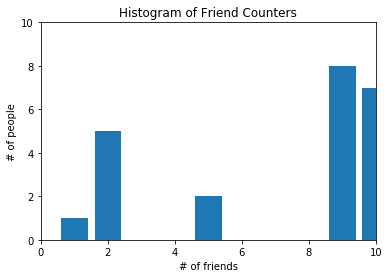

In [2]:
## big data set이 되면 data set에 대한 분석이 어려워진다.
## ex. 평균값, 최댓값, 최솟값 등
## 그런 경우 statistics를 이용하면 분석이 용이하다.

## 항목을 세는 함수 import
from collections import Counter
## 데이터 시각화
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)
ys=[friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 10, 0, 10])
plt.title("Histogram of Friend Counters")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

### (3) data set의 statistics적 해석

In [3]:
num_points = len(num_friends)
largest_value = max(num_friends)
smallest_value = min(num_friends)
sorted_values = sorted(num_friends)
smallest_value2 = sorted_values[0]
second_smallest_value = sorted_values[1]
largest_value2 = sorted_values[-1]
print(num_points)
print(largest_value)
print(smallest_value)
print(sorted_values)
print(smallest_value2)
print(second_smallest_value)
print(largest_value2)

23
10
1
[1, 2, 2, 2, 2, 2, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10]
1
2
10


## 2. Central Tendencies

### (1) mean (평균값)

In [4]:
def mean(x): return sum(x)/len(x)
mean(num_friends)

7.086956521739131

### (2) median(중간값)

In [5]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n//2
    if n%2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint-1
        hi = midpoint
        return (sorted_v[lo]+sorted_v[hi])
    
median(num_friends)

9

### (3) quantile

In [6]:
def quantile(x, p):
    p_index = int(p*len(x))
    return sorted(x) [p_index]
quantile(num_friends, 0.10)
quantile(num_friends, 0.25)
quantile(num_friends, 0.75)
quantile(num_friends, 0.90)

10

### (4) mode

In [36]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems()
            if count == max_count]

## 3. Dispersion

### data set

In [17]:
def data_range(x):
    return max(x)-min(x)
data_range(num_friends)

9

### mean, variance

In [20]:
def de_mean(x):
    x_bar = mean(x)
    return [x_i-x_bar for x_i in x]
de_mean(num_friends)

[-6.086956521739131,
 -5.086956521739131,
 -5.086956521739131,
 -5.086956521739131,
 -5.086956521739131,
 -5.086956521739131,
 -2.086956521739131,
 -2.086956521739131,
 1.9130434782608692,
 1.9130434782608692,
 1.9130434782608692,
 1.9130434782608692,
 1.9130434782608692,
 1.9130434782608692,
 1.9130434782608692,
 1.9130434782608692,
 2.913043478260869,
 2.913043478260869,
 2.913043478260869,
 2.913043478260869,
 2.913043478260869,
 2.913043478260869,
 2.913043478260869]

In [21]:
def sum_of_squares(n):
    return sum(n_i ** 2 for n_i in n)

def variance(x):
    n=len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)
variance(num_friends)

11.992094861660082

In [24]:
import math

def standard_deviation(x):
    return math.sqrt (variance(x))

standard_deviation(num_friends)

3.4629604187255856

In [25]:
def interquartile_range(x):
    return quantile(x, 0.75)-quantile(x,0.25)

interquartile_range(num_friends)

8

## 4. Correlation

In [27]:
## data set
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [39]:
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def convariance(x, y):
    n=len(x)
    return dot(de_mean(x), de_mean(y))/(n-1)

convariance(num_friends, daily_minutes)

6.735795454545456

In [42]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y >0:
        return convariance(x, y) / stdev_x / stdev_y
    else:
        return 0
correlation(num_friends, daily_minutes)

0.5761934517843594

In [49]:
##outlier = num_friends.index(100)
outlier = len(num_friends)

num_friends_good = [x 
                    for i, x in enumerate(num_friends) 
                    if i != outlier]
daily_minutes_good = [x 
                      for i, x in enumerate (daily_minutes) 
                      if i != outlier]
correlation(num_friends_good, daily_minutes_good)

0.5761934517843594